# 画像生成AIで利用するGPUをランタイムで利用できるように設定する

ランタイム－＞ランタイムのタイプを変更－＞T4 GPU
を選択

# ランタイムでGPUが使えるかの確認コマンド

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('GPUが使えません。ランタイムタイプの変更を確認してください')
else:
  print("GPUが使えます")
  #print(gpu_info)

GPUが使えます


# Stable Diffusionに必要なライブラリをインストール

In [8]:
!pip install diffusers transformers ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

# google driveが使えるよに設定
下記実行すると、ポップアップウィンドウが表示されるのでソースコードを保存したgoogleアカウントを選択して指示通り続行してください。

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Stable Diffusionをつかってプロンプトで指定した画像を生成する

!python Generate_Image.py --prompt "hoge hoge"

の"hoge hoge"の部分に生成したい画像の説明（プロンプト）を記載する

スコア7以上を目指してみよう

In [10]:
%cd "/content/drive/MyDrive/Colab Notebooks/Generate_Image"
!python Generate_Image.py --prompt "Mt. Fuji in the style of Gauguin" # Aesthetics score: 7.48
#!python Generate_Image.py --prompt "Mt. Fuji in the style of Gogh"
#!python Generate_Image.py --prompt "Mt. Fuji in the style of Hokusai"
#!python Generate_Image.py --prompt "Mt. Fuji"

/content/drive/MyDrive/Colab Notebooks/Generate_Image
2025-04-07 05:35:01.658122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744004101.908127    2493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744004101.977729    2493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
model_index.json: 100% 543/543 [00:00<00:00, 2.66MB/s]
Fetching 13 files:   0% 0/13 [00:00<?, ?it/s]Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`

preprocessor_config.json: 100% 342/342 [00:00<00:0

# 生成した画像を表示する

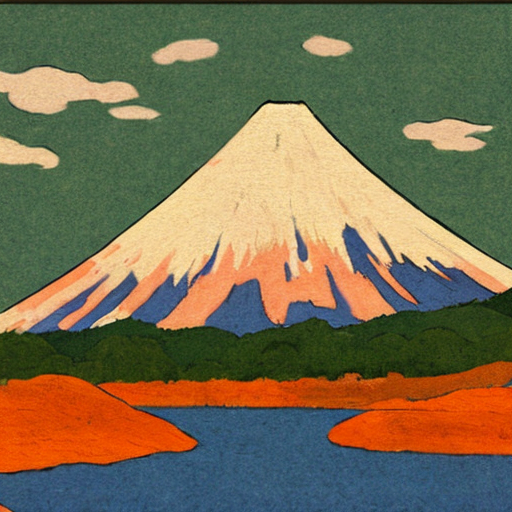

In [11]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/Generate_Image/generate.png')

# 生成した画像を評価するためのプログラムに必要なライブラリをインストール

In [14]:
!pip install simple-aesthetics-predictor pillow

# 生成された画像を評価してスコアを付ける

In [15]:
!python Evalute_Image.py

2025-04-07 05:36:55.567616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744004215.588575    3100 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744004215.594792    3100 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 05:36:55.615376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 662/662 [00:00<00:00, 4.43MB/s]
model.safetensors: 100% 1.22G/1.22G [00:05<00:00, 241MB/s]
preprocessor_con

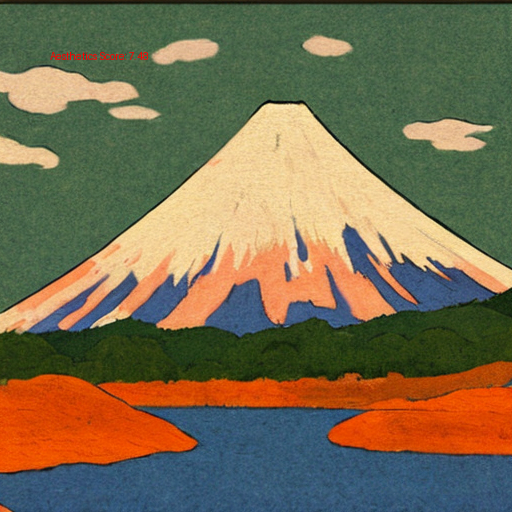

In [16]:
Image('/content/drive/MyDrive/Colab Notebooks/Generate_Image/generate_with_score.png')